Tópico 21 – Aplicar o método Crescimento de regiões em imagens binárias com inicialização com click na imagem. 
Tópico da aula 9.

In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1

    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))

    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))

    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    return out

def  CrescimentoDeRegiao(img, seed):
    list = []
    outimg = np.zeros_like(img)
    list.append((seed[0], seed[1]))
    processed = []
    while(len(list) > 0):
        pix = list[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    list.append(coord)
                processed.append(coord)
        list.pop(0)
        cv2.imshow("Crescimento de região: ",outimg)
        cv2.waitKey(1)
    return outimg

In [2]:
def Click(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print ('Posição do clique: ' + str(x) + ', ' + str(y))
        print ('Pressione enter para iniciar o processo de Crescimento de Região e aguarde o processamento')
        clicks.append((y,x))

Posição do clique: 212, 77
Pressione enter para iniciar o processo de Crescimento de Região e aguarde o processamento


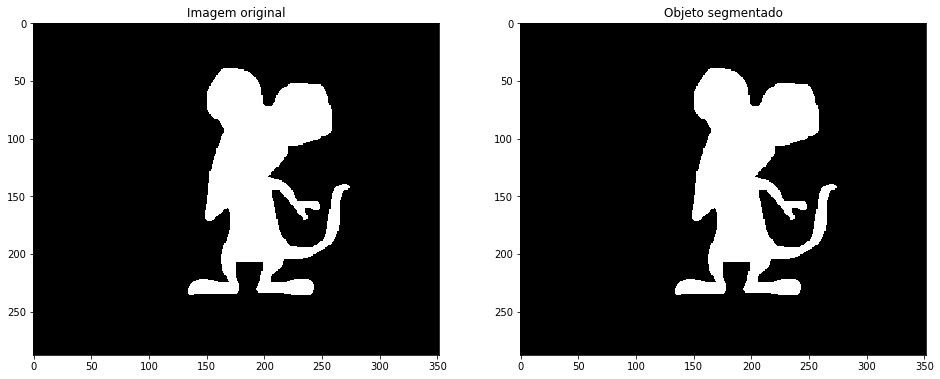

In [3]:
if __name__ == '__main__':
    clicks = []
    # Abrindo a imagem .gif e convertendo para png
    Image.open('imagens/rat-08.gif').convert('RGB').save('imagens/rat-08.png')

    image = cv2.imread('imagens/rat-08.png', 0)
    ret, img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    cv2.namedWindow('Entrada: ')
    cv2.setMouseCallback('Entrada: ', Click, 0, )
    cv2.imshow('Entrada: ', img)
    cv2.waitKey()
    seed = clicks[-1]
    out = CrescimentoDeRegiao(img, seed)
  #  cv2.waitKey()
    cv2.destroyAllWindows()
    
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(2, 2, 1)
    plt.imshow(image, 'gray')
    plt.title("Imagem original")   
        
    plt.subplot(2, 2, 2)
    plt.imshow(out, 'gray')
    plt.title("Objeto segmentado")    